In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
import seaborn as sn
import streamlit as st
from matplotlib.figure import Figure

# st.set_option('deprecation.showPyplotGlobalUse', False)

# st.title('Analyse van FLUVIUS dataset')

# st.header('Data inlezen en omzetten')

names=['From','To','meterID','seq','Bx','23','E12-E17','kWx','A_C_I','Plaats']
for i in np.arange(0,96):
    names.append('kwartier_'+str(i))
      

filename='AMR_REPORTING_EXPORT_depurated.csv' #'AMR_REPORTING_EXPORT_29okt21_verwerkt.csv'    
data=pd.read_csv(filename,names=names,delimiter=';',index_col=False)
data.From=pd.to_datetime(data['From'],format='%d%m%Y %H:%M')
data=data.sort_values('From')

data.head()

,From,To,meterID,seq,Bx,23,E12-E17,kWx,A_C_I,Plaats,...,kwartier_86,kwartier_87,kwartier_88,kwartier_89,kwartier_90,kwartier_91,kwartier_92,kwartier_93,kwartier_94,kwartier_95
4394,2018-06-16 23:00:00,17062018 23:00,541449500001660041,0,B30,23,E12-E17,KVR,I+,COLOMBUS - HTC,...,66.92,67.76,64.96,66.22,66.92,67.62,68.18,70.56,67.20,65.24
4392,2018-06-16 23:00:00,17062018 23:00,541449500001660041,0,B31,23,E12-E17,KWT,A+,COLOMBUS - HTC,...,158.06,157.36,156.38,158.34,160.44,158.76,162.26,165.34,157.78,155.26
4393,2018-06-16 23:00:00,17062018 23:00,541449500001660041,0,B29,23,E12-E17,KVR,C-,COLOMBUS - HTC,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5487,2018-06-17 05:00:00,18062018 05:00,541448860012075359,0,B31,27,E12-E17,KWH,A+,COLOMBUS - HTC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5488,2018-06-17 05:00:00,18062018 05:00,SUB(541448860012075359),0,B1,27,E12-E17,MTQ,A+,COLOMBUS - HTC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
inter=data.A_C_I.unique()
inter

array(['I+', 'A+', 'C-'], dtype=object)

In [329]:
dataAct_a=data.loc[data['A_C_I']=='A+']

dataInd_a=data.loc[data['A_C_I']=='I+']

dataCap_a=data.loc[data['A_C_I']=='C-']

dataX=data.loc[data['A_C_I'].isna()]

In [330]:
def transfoE(data,startDatum):

    if data.kWx.unique()[0] =='KWH':
        dataA=[]
        for i in np.arange(0,data.iloc[:,0].size):
            temp=data.iloc[i,10:34].transpose().values
            for j in np.arange(0,temp.size):
                if not(pd.isna(temp[j])):
                    dataA.append(temp[j])
        dataA=np.array(dataA)
        lab='Energie_kWh'
        uni='kWh'
        datee=pd.date_range(start=startDatum,periods=dataA.size,freq='1H')
        dataA=pd.DataFrame({'Date':datee,lab:dataA})
        dataA=dataA.set_index('Date',drop=True)
        
    elif data.kWx.unique()[0] =='KVR':
        dataA=[]
        for i in np.arange(0,data.iloc[:,0].size):
            temp=data.iloc[i,10:34].transpose().values
            for j in np.arange(0,temp.size):
                if not(pd.isna(temp[j])):
                    dataA.append(temp[j])
        dataA=np.array(dataA)
        lab='Vermogen_kVAr'
        uni='kVAr'
        datee=pd.date_range(start=startDatum,periods=dataA.size,freq='1H')
        dataA=pd.DataFrame({'Date':datee,lab:dataA})
        dataA=dataA.set_index('Date',drop=True)

    elif data.kWx.unique()[0]=='KWT':
        dataA=[]
        for i in np.arange(0,data.iloc[:,0].size):
            temp=data.iloc[i,10:].transpose().values
            for j in np.arange(0,temp.size):
                if not(pd.isna(temp[j])):
                    dataA.append(temp[j])
        dataA=np.array(dataA)
        lab='Vermogen_kW'
        uni='kW'
        datee=pd.date_range(start=startDatum,periods=dataA.size,freq='15T')
        dataA=pd.DataFrame({'Date':datee,lab:dataA})
        dataA=dataA.set_index('Date',drop=True)
        
    else: 
        dataMTQ=data[data.kWx=='MTQ']
        dataA=[]
        for i in np.arange(0,dataMTQ.iloc[:,0].size):
            temp=dataMTQ.iloc[i,10:34].transpose().values
            for j in np.arange(0,temp.size):
                if not(pd.isna(temp[j])):
                    dataA.append(temp[j])
        dataAMTQ=np.array(dataA)
        lab1='Energie_m3'
        uni='m3'
        datee=pd.date_range(start=startDatum,periods=dataAMTQ.size,freq='1H')
        
        
        dataD90=data[data.kWx=='D90']
        dataA=[]
        for i in np.arange(0,dataD90.iloc[:,0].size):
            temp=dataD90.iloc[i,10:34].transpose().values
            for j in np.arange(0,temp.size):
                if not(pd.isna(temp[j])):
                    dataA.append(temp[j])
        dataAD90=np.array(dataA)
        lab2='Energie_m3N'
        uni='m3N'
        datee=pd.date_range(start=startDatum,periods=dataAD90.size,freq='1H')
        dataA=pd.DataFrame({'Date':datee,lab1:dataAMTQ,lab2:dataAD90})#,lab2:dataAD90'Date':datee,lab1:dataAMTQ,
        dataA=dataA.set_index('Date',drop=True)
        
    dataA=dataA.astype(float)

    return dataA

In [331]:
meters=data.meterID.unique()
meters

array(['541449500001660041', '541448860012075359',
       'SUB(541448860012075359)'], dtype=object)

In [332]:
dataAct_a.meterID.unique()

array(['541449500001660041', '541448860012075359',
       'SUB(541448860012075359)'], dtype=object)

In [333]:
dataInd_a.meterID.unique()

array(['541449500001660041'], dtype=object)

In [334]:
dataCap_a.meterID.unique()

array(['541449500001660041'], dtype=object)

In [335]:
def datameter(meter):
    tempoAct=dataAct_a[(dataAct_a['meterID']==meter)] # & (dataAct_a['kWx']=='KWT')
    dataA=transfoE(tempoAct,tempoAct.From.iloc[0])
    tempoInd=dataInd_a[(dataInd_a['meterID']==meter)] # & (dataAct_a['kWx']=='KWT')
    dataI=transfoE(tempoInd,tempoInd.From.iloc[0])
    tempoCap=dataCap_a[(dataCap_a['meterID']==meter)] # & (dataAct_a['kWx']=='KWT')
    dataC=transfoE(tempoCap,tempoCap.From.iloc[0])
    return dataA,dataI,dataC

dataAct_41,dataInd_41,dataCap_41=datameter(meters[0])

In [336]:
dataAct_41.describe()

,Vermogen_kW
count,105300.000000
mean,227.501740
std,62.823936
min,0.000000
25%,181.440000
50%,216.160000
75%,272.160000
max,483.700000


In [337]:
dataInd_41.describe()

,Vermogen_kVAr
count,26328.000000
mean,72.857982
std,17.315073
min,0.000000
25%,61.460000
50%,73.780000
75%,84.980000
max,134.260000


In [338]:
dataCap_41.describe()

,Vermogen_kVAr
count,26328.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [339]:
tempoAct=dataAct_a[(dataAct_a['meterID']==meters[1])] # & (dataAct_a['kWx']=='KWT')
dataA_59=transfoE(tempoAct,tempoAct.From.iloc[0])
dataA_59.describe()

,Energie_kWh
count,26325.000000
mean,1613.779823
std,1056.680057
min,0.000000
25%,574.700000
50%,1519.210000
75%,2320.930000
max,6362.490000


In [340]:
tempoAct=dataAct_a[(dataAct_a['meterID']==meters[2])] # & (dataAct_a['kWx']=='KWT')
dataA_59sub=transfoE(tempoAct,tempoAct.From.iloc[0])
dataA_59sub.describe()


,Energie_m3,Energie_m3N
count,26325.000000,26325.000000
mean,97.326534,139.937740
std,63.606812,91.595217
min,0.000000,0.000000
25%,35.000000,50.000000
50%,92.000000,132.000000
75%,140.000000,201.000000
max,388.000000,553.000000


In [341]:
print('Totale actieve energie van meter xx41 is '+str(dataAct_41.sum().values*0.25)+' kWh')

Totale actieve energie van meter xx41 is [5988983.315] kWh


In [342]:
print('Totale actieve energie van meter xx59 is '+str(dataA_59.sum())+' kWh')

Totale actieve energie van meter xx59 is Energie_kWh    42482753.84
dtype: float64 kWh


In [343]:
print('Totale actieve energie van meter xx59 SUB is '+str(dataA_59sub.sum())+' kWh')

Totale actieve energie van meter xx59 SUB is Energie_m3     2562121.0
Energie_m3N    3683861.0
dtype: float64 kWh


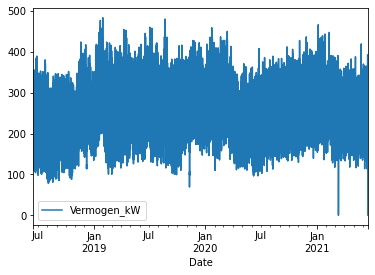

In [344]:
dataAct_41.plot()

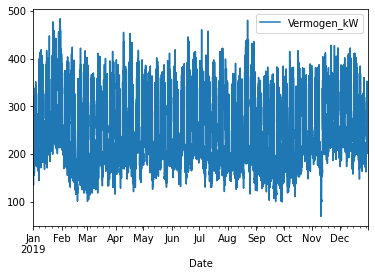

In [345]:
dataAct_41[dataAct_41.index.year==2019].plot()

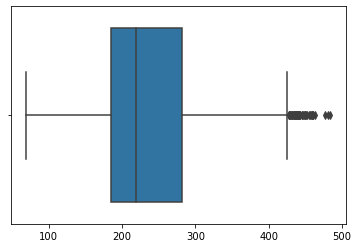

In [346]:
sn.boxplot(dataAct_41[dataAct_41.index.year==2019])

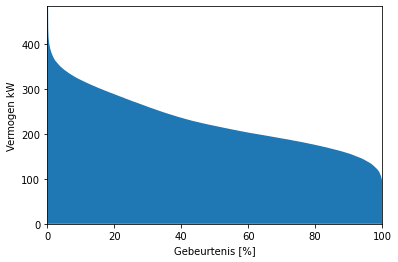

In [347]:
# Duurcurve

sort=np.sort(dataAct_41['Vermogen_kW'])[::-1]
exceedence = np.arange(1.,len(sort)+1) / len(sort)

plt.plot(exceedence*100, sort)
plt.fill_between(exceedence*100, sort)
plt.xlabel("Gebeurtenis [%]")
plt.ylabel("Vermogen kW")
plt.axis([0,100,sort.min(),sort.max()])
plt.show()

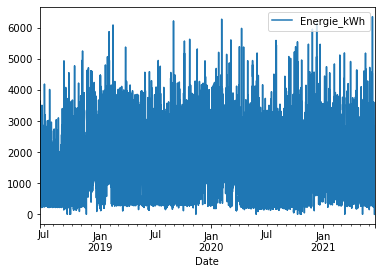

In [348]:
dataA_59.plot()

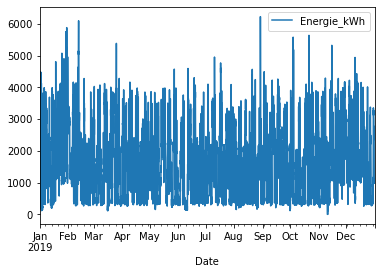

In [349]:
dataA_59[dataA_59.index.year==2019].plot()

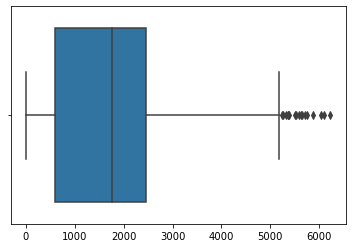

In [350]:
sn.boxplot(dataA_59[dataA_59.index.year==2019])

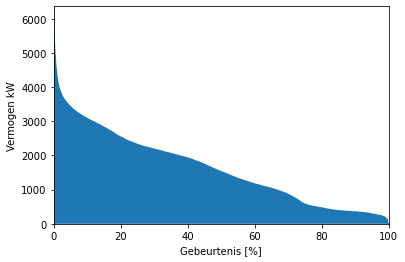

In [351]:
# Duurcurve

sort=np.sort(dataA_59['Energie_kWh'])[::-1]
exceedence = np.arange(1.,len(sort)+1) / len(sort)

plt.plot(exceedence*100, sort)
plt.fill_between(exceedence*100, sort)
plt.xlabel("Gebeurtenis [%]")
plt.ylabel("Vermogen kW")
plt.axis([0,100,sort.min(),sort.max()])
plt.show()

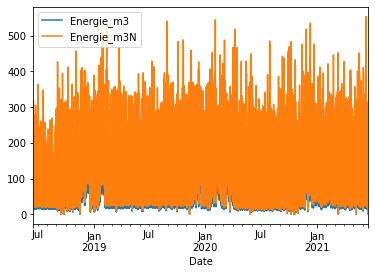

In [352]:
dataA_59sub.plot()

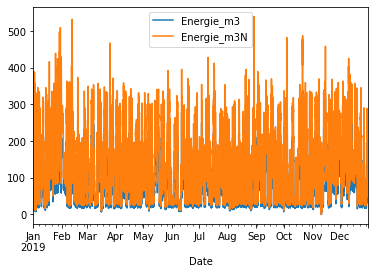

In [353]:
dataA_59sub[dataA_59sub.index.year==2019].plot()

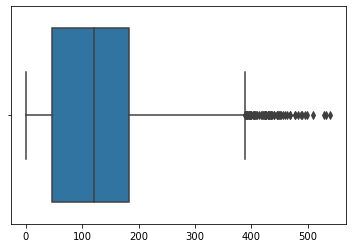

In [354]:
sn.boxplot(dataA_59sub[dataA_59sub.index.year==2019])

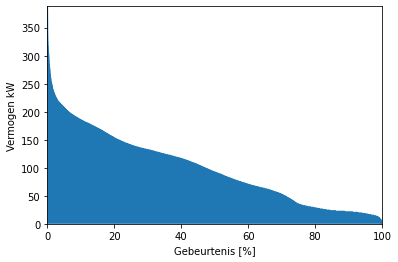

In [355]:
# Duurcurve

sort=np.sort(dataA_59sub['Energie_m3'])[::-1]
exceedence = np.arange(1.,len(sort)+1) / len(sort)

plt.plot(exceedence*100, sort)
plt.fill_between(exceedence*100, sort)
plt.xlabel("Gebeurtenis [%]")
plt.ylabel("Vermogen kW")
plt.axis([0,100,sort.min(),sort.max()])
plt.show()

In [356]:
dataAct_41.index

DatetimeIndex(['2018-06-16 23:00:00', '2018-06-16 23:15:00',
               '2018-06-16 23:30:00', '2018-06-16 23:45:00',
               '2018-06-17 00:00:00', '2018-06-17 00:15:00',
               '2018-06-17 00:30:00', '2018-06-17 00:45:00',
               '2018-06-17 01:00:00', '2018-06-17 01:15:00',
               ...
               '2021-06-17 17:30:00', '2021-06-17 17:45:00',
               '2021-06-17 18:00:00', '2021-06-17 18:15:00',
               '2021-06-17 18:30:00', '2021-06-17 18:45:00',
               '2021-06-17 19:00:00', '2021-06-17 19:15:00',
               '2021-06-17 19:30:00', '2021-06-17 19:45:00'],
              dtype='datetime64[ns]', name='Date', length=105300, freq=None)

In [357]:
dataAct_41_LJ=dataAct_41[(dataAct_41.index>='2020-06-01 00:00:00') & (dataAct_41.index<'2021-06-01 00:00:00')]

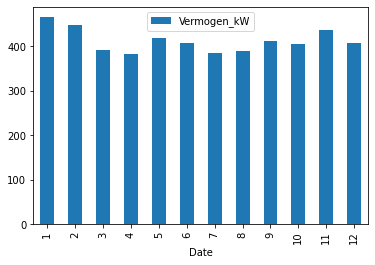

In [358]:
dataAct_41_LJ_p=dataAct_41_LJ.groupby(dataAct_41_LJ.index.month).max()
dataAct_41_LJ_p.plot.bar()


In [359]:
dataA_59_LJ=dataA_59[(dataA_59.index>='2020-06-01 00:00:00') & (dataA_59.index<'2021-06-01 00:00:00')]

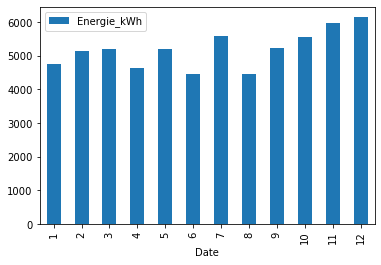

In [360]:
dataA_59_LJ_p=dataA_59_LJ.groupby(dataA_59_LJ.index.month).max()
dataA_59_LJ_p.plot.bar()

In [361]:
dataAct_41.index.min()

Timestamp('2018-06-16 23:00:00')

In [362]:
dataAct_41.index.max()

Timestamp('2021-06-17 19:45:00')

In [363]:
dataA_59.index.min()

Timestamp('2018-06-17 05:00:00')

In [364]:
dataA_59.index.max()

Timestamp('2021-06-18 01:00:00')

In [365]:
dataA_59sub.index.min()

Timestamp('2018-06-17 05:00:00')

In [366]:
dataA_59sub.index.max()

Timestamp('2021-06-18 01:00:00')

In [367]:
dataAct_41=dataAct_41[dataAct_41.index>=dataA_59.index.min()]

In [368]:
dataA_59=dataA_59[dataA_59.index<=dataAct_41.index.max()]

In [369]:
dataA_59sub=dataA_59sub[dataA_59sub.index<=dataAct_41.index.max()]

In [370]:
dataAct_41H=dataAct_41.resample('1H').sum()*.25

In [371]:
allmeters=pd.concat([dataAct_41H,dataA_59,dataA_59sub],axis=1)

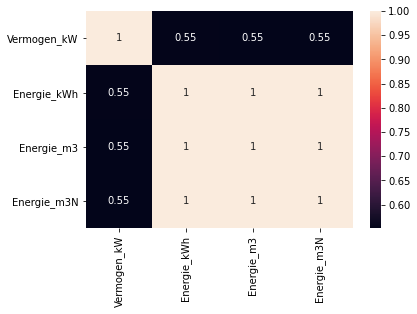

In [372]:
sn.heatmap(allmeters.corr(),annot=True)

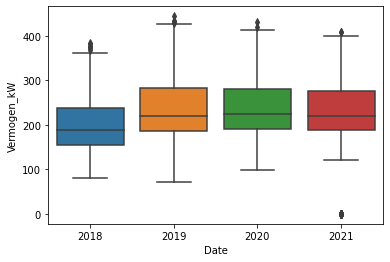

In [373]:
sn.boxplot(x=allmeters.index.year,y='Vermogen_kW',data=allmeters)

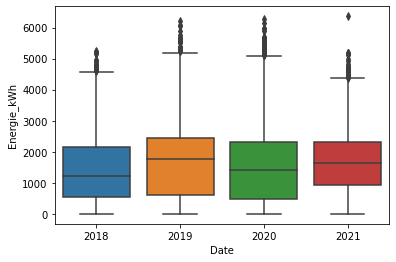

In [374]:
sn.boxplot(x=allmeters.index.year,y='Energie_kWh',data=allmeters)

In [375]:
weer=pd.read_csv('POWER_Hourly_20180601_20210630.csv',skiprows=17)

In [376]:
weer=weer.rename(columns={'YEAR':'year','MO':'month','DY':'day','HR':'hour'})
weer['indx']=pd.to_datetime(weer[['year','month','day','hour']])
weer=weer.set_index('indx',drop=True)
weer=weer[(weer.index>=allmeters.index.min()) & (weer.index<=allmeters.index.max())]

weer=weer.drop(['year','month','day','hour'],axis=1)

In [377]:
allmeters=pd.concat([allmeters,weer],axis=1)

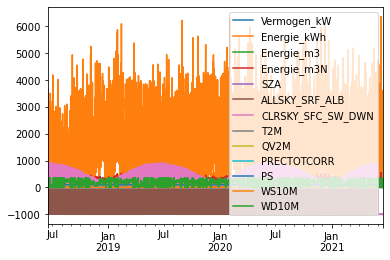

In [378]:
allmeters.plot()

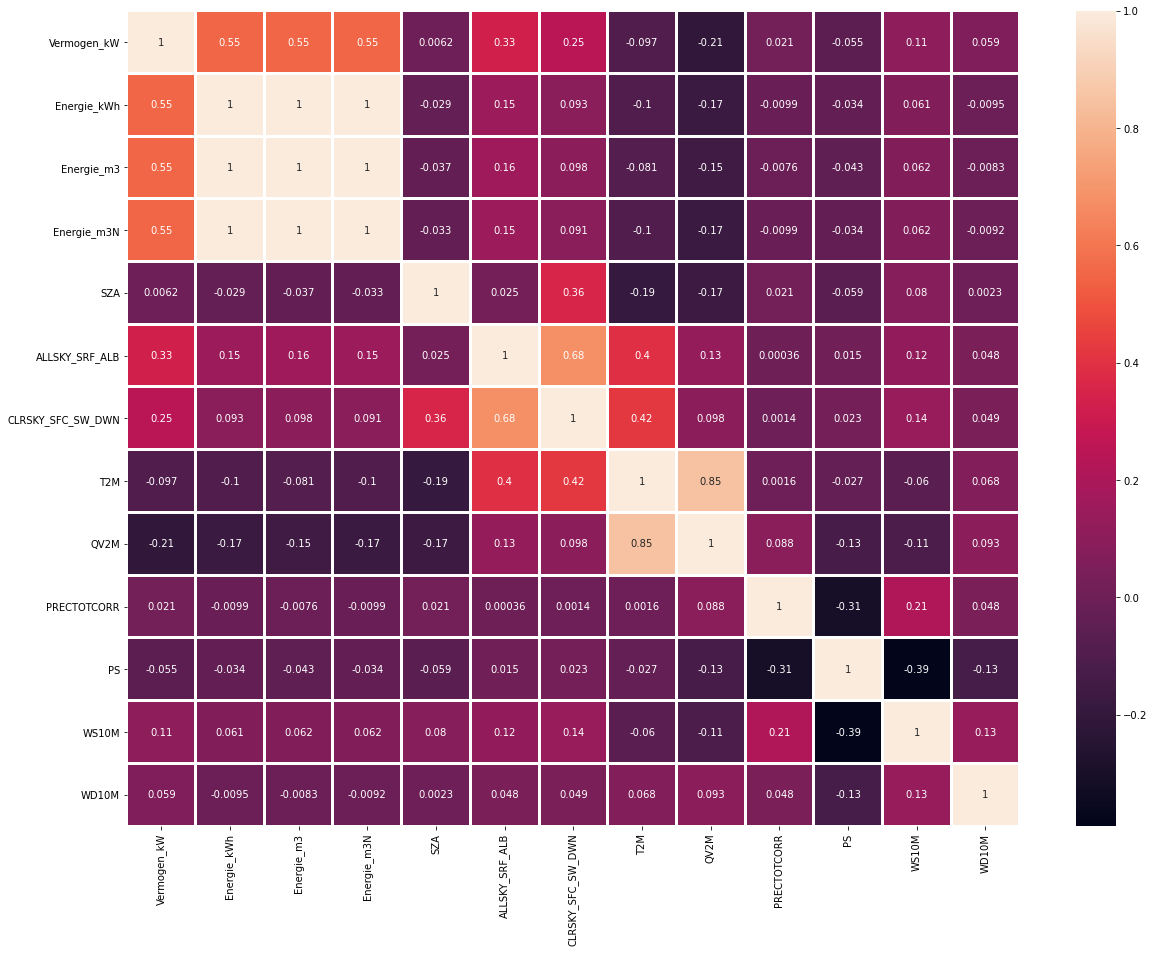

In [379]:
plt.figure(figsize=(20,15))
sn.heatmap(allmeters.corr(),annot=True,linewidths=2)

In [380]:
# allmeters.index.month
allmeters.groupby((allmeters.index.month==5) & (allmeters.index.year==2021) ).sum()

,Vermogen_kW,Energie_kWh,Energie_m3,Energie_m3N,SZA,ALLSKY_SRF_ALB,CLRSKY_SFC_SW_DWN,T2M,QV2M,PRECTOTCORR,PS,WS10M,WD10M
False,5829377.750,41351563.43,2493706.0,3585543.0,1569728.23,-12808976.48,4326212.96,283164.35,175520.08,2133.29,2592597.75,128724.82,4887989.47
True,158719.085,1131190.41,68415.0,98318.0,51096.07,-259644.02,238829.31,8327.15,4875.51,87.21,75074.00,3756.39,157453.66


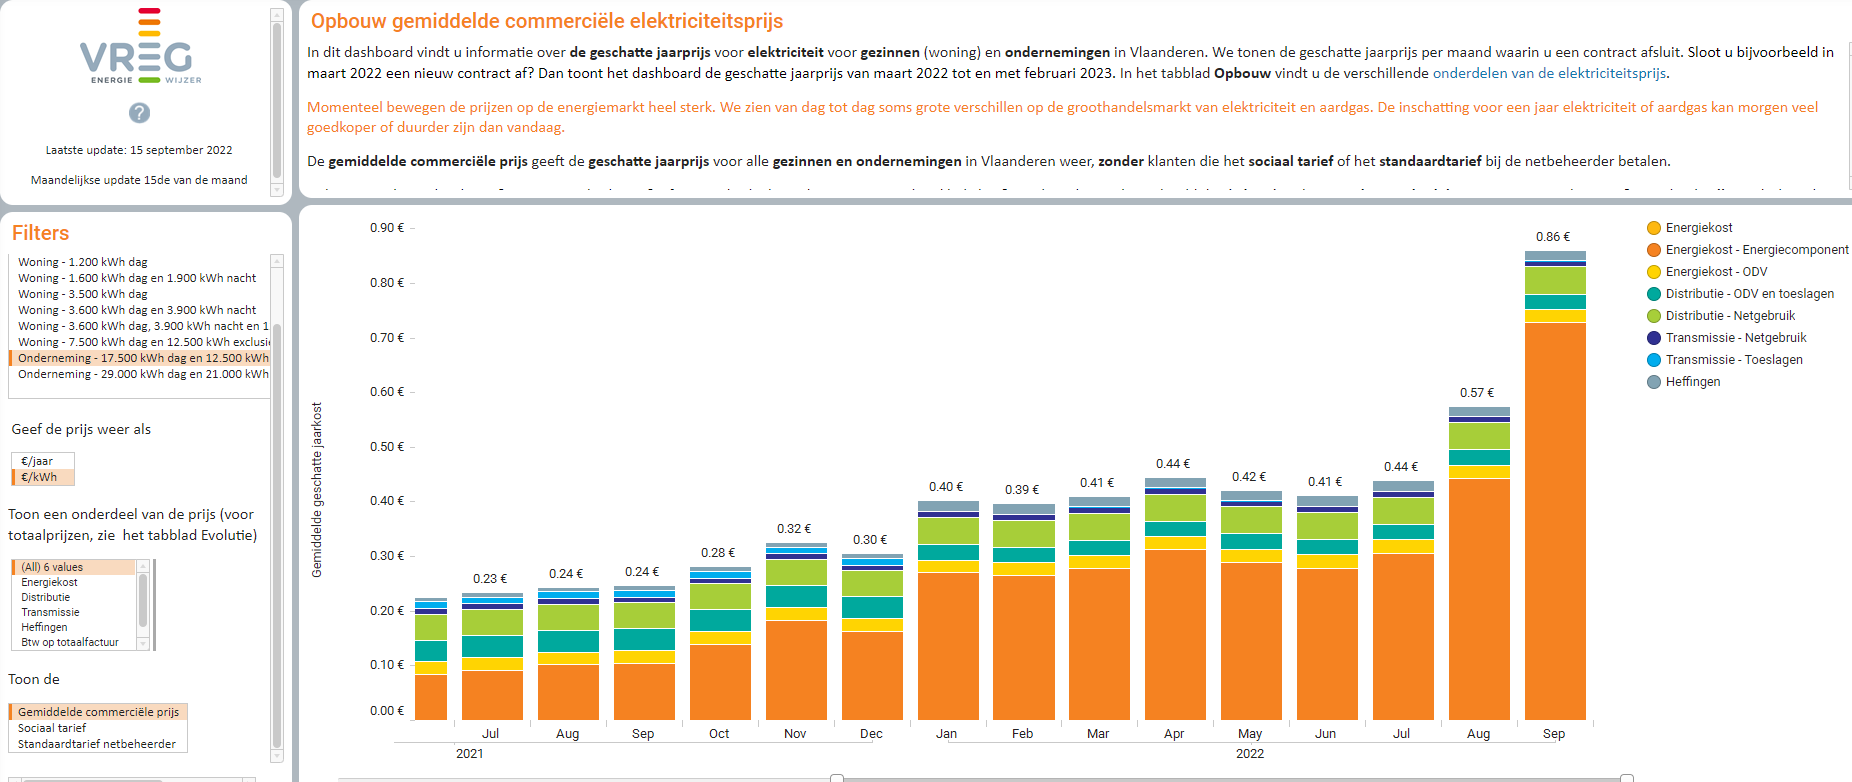

In [381]:
158719.085*.23

36505.38955

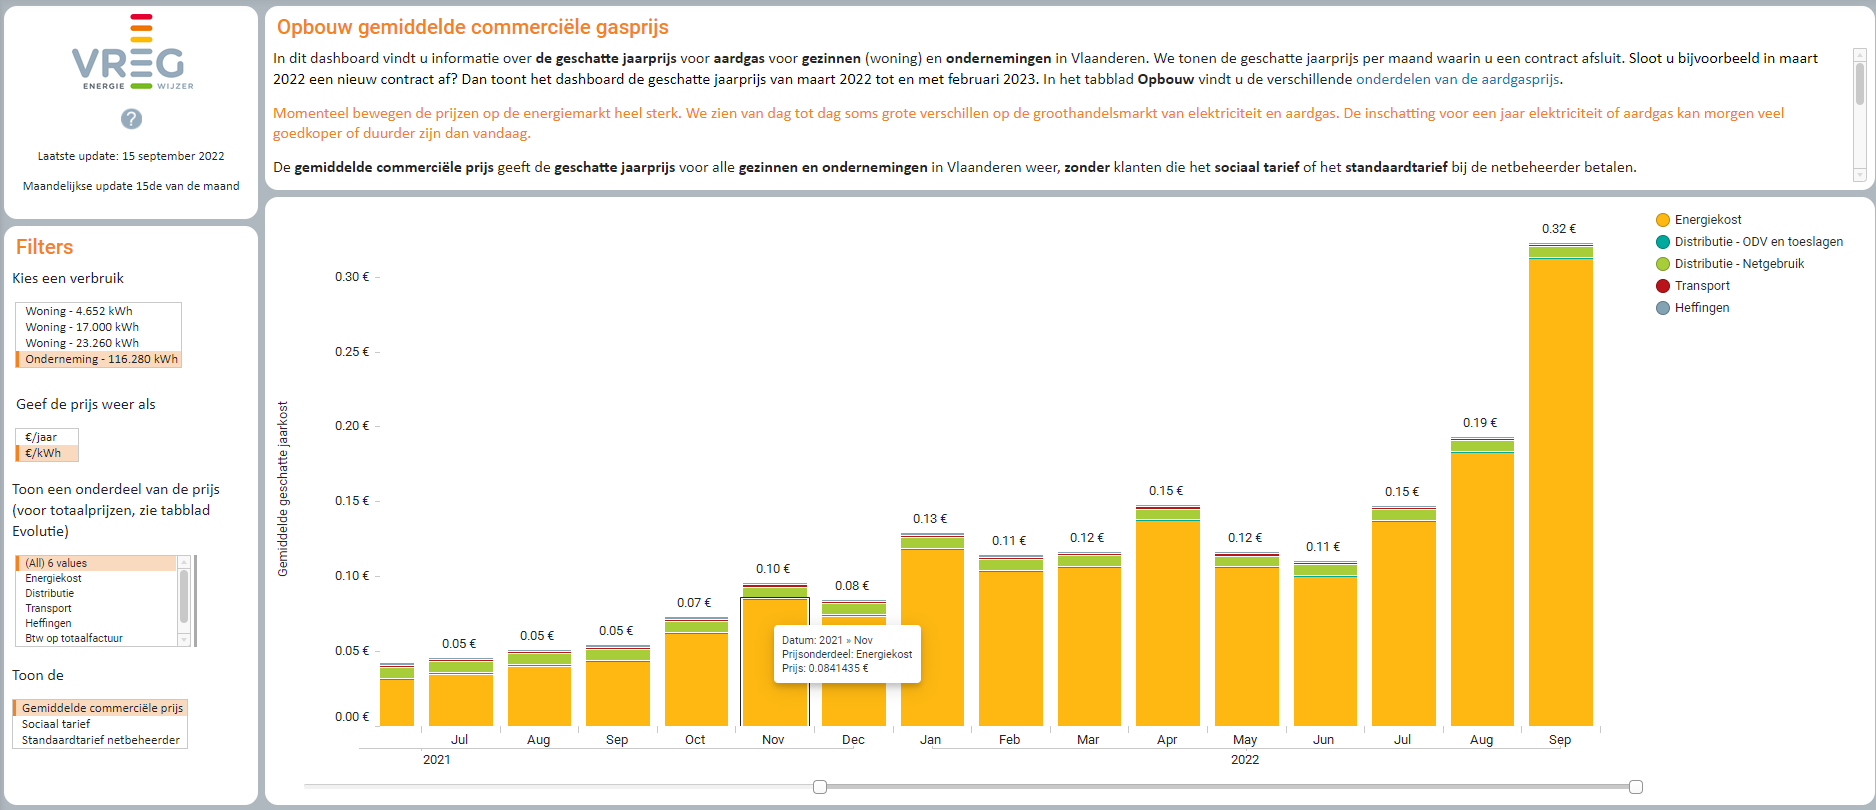

In [382]:
1131190.41*.05

56559.5205